In [1]:
# -*- coding: UTF-8 -*-

# Render our plots inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import shutil

pd.set_option('display.max_columns', None) # Display all the columns

sns.set()
#sns.set_style("whitegrid") # Seaborn style


In [3]:
data = pd.read_csv("csv/results.csv")

In [4]:
columns = ['Q11[SQ002]','Q11[SQ003]','Q11[SQ004]','Q11[SQ005]','Q11[SQ006]','Q11[SQ007]']
columns_names = [
    'I am a Maker myself',
    'I am a Maker myself (>5 years)',
    'I am a Fab Lab manager',
    'I am a Maker Faire organizer',
    'I am a researcher',
    "I don't really consider myself a Maker yet"
]
options = [
    'Yes',
    'No',
]
profile = data[columns]

In [5]:
profile.columns = columns_names

In [6]:
profile2 = profile.apply(pd.Series.value_counts).fillna(0).transpose()

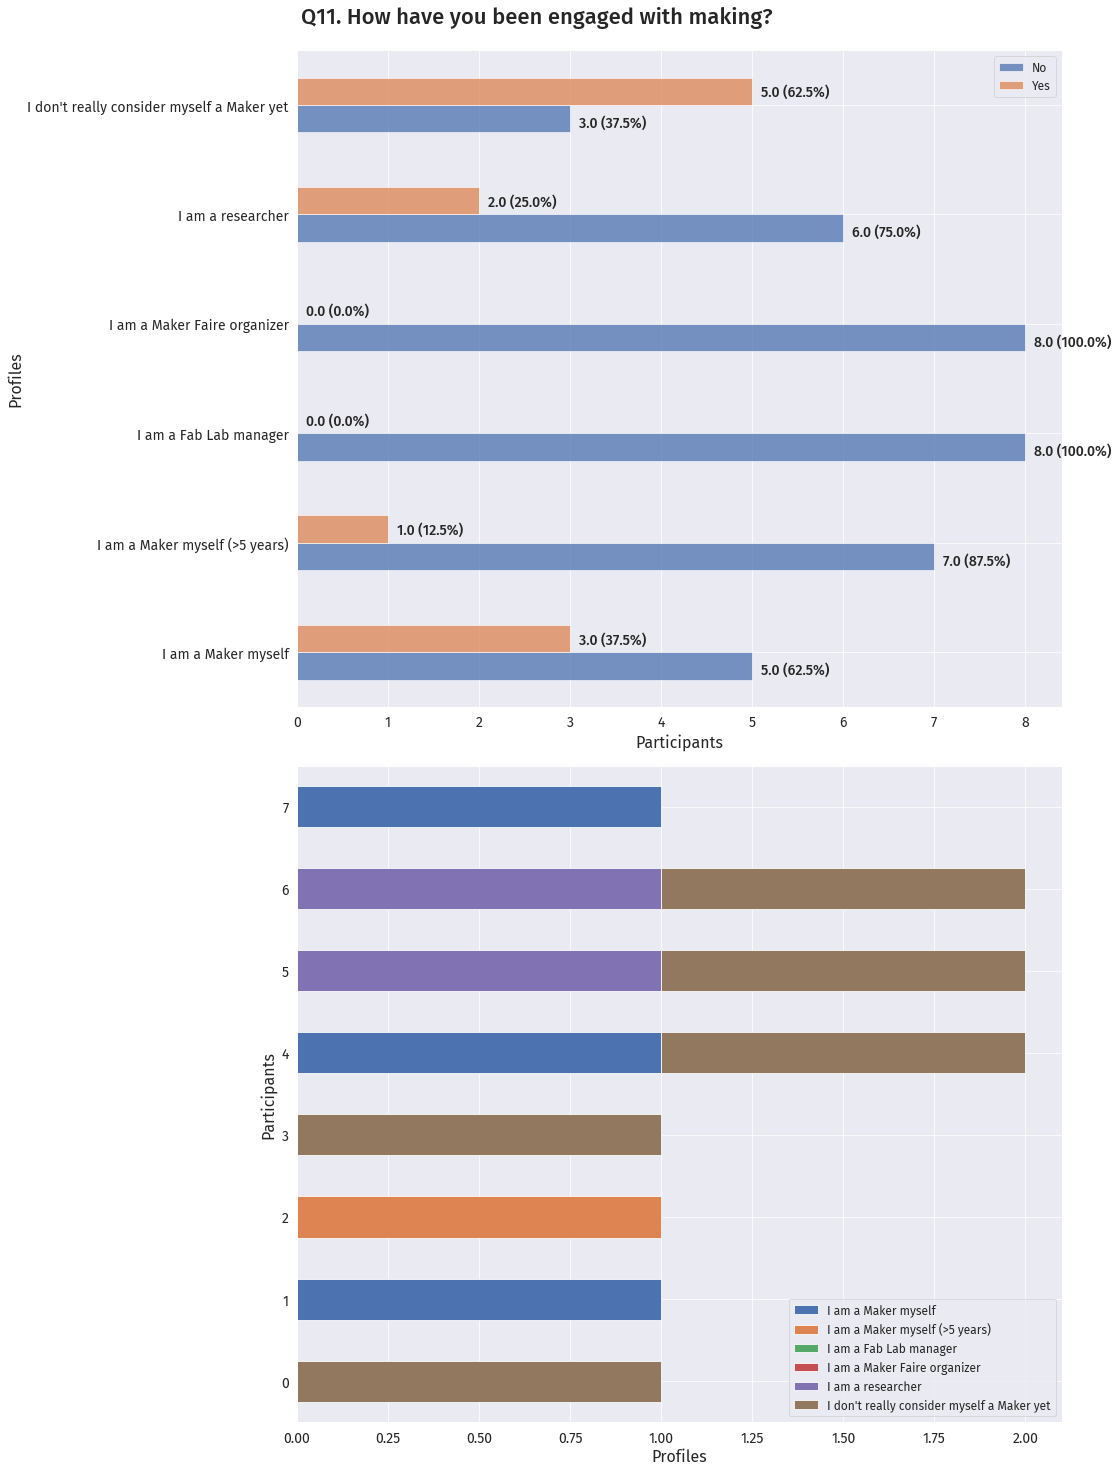

In [7]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper")
# Subplots
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Q11. How have you been engaged with making?', fontsize=22, fontname='Fira Sans', fontweight="500", y=1.02)
# Plot the data 1
ax1 = fig.add_subplot(2, 1, 1)
profile2.plot(kind='barh', alpha=0.75, rot=0, ax=plt.gca())
ax1.legend(fontsize=12)
for i in range(len(profile2)):
    this_total = profile2.iloc[i]['Yes'] + profile2.iloc[i]['No'] * 1.0
    plt.text(profile2.iloc[i]['Yes'] + .1, i+.08, str(profile2.iloc[i]['Yes'])+" ("+str(profile2.iloc[i]['Yes']/this_total * 100.0)+"%)", fontweight='500', fontsize=14)
    plt.text(profile2.iloc[i]['No'] + .1, i-.2, str(profile2.iloc[i]['No'])+" ("+str(profile2.iloc[i]['No']/this_total * 100.0)+"%)", fontweight='500', fontsize=14)
plt.xlabel('Participants', fontsize=16)
plt.ylabel('Profiles', fontsize=16, x=2.82)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# Plot the data 2
ax2 = fig.add_subplot(2, 1, 2)
profile.replace("No", 0).replace("Yes", 1).plot(kind="barh", rot=0, ax=plt.gca(), stacked=True)
ax2.legend(fontsize=12)
plt.xlabel('Profiles', fontsize=16)
plt.ylabel('Participants', fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.savefig("svg/Q11.svg", bbox_inches="tight")
plt.savefig("png/Q11.png", dpi=300, bbox_inches="tight")